# Chapter 14

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Rank of tensor

In [2]:
g = tf.Graph()

with g.as_default():
    #テンソルt1,t2,t3を定義
    t1 = tf.constant(np.pi)
    t2 = tf.constant([1,2,3,4])
    t3 = tf.constant([[1,2],[3,4]])
    
    #テンソルt1,t2,t3の階数を取得
    r1 = tf.rank(t1)
    r2 = tf.rank(t2)
    r3 = tf.rank(t3)
    
    #テンソルt1,t2,t3の形状を取得
    s1 = t1.get_shape()
    s2 = t2.get_shape()
    s3 = t3.get_shape()
    print('Shapes:', s1, s2, s3)

Shapes: () (4,) (2, 2)


In [3]:
with tf.Session(graph=g) as sess:
    print('Ranks:', r1.eval(), r2.eval(), r3.eval())

Ranks: 0 1 2


## 計算グラフ

In [4]:
g = tf.Graph()

with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    z = 2 * (a - b) + c

In [5]:
with tf.Session(graph=g) as sess:
    print('2*(a-b)+c => ', sess.run(z))

2*(a-b)+c =>  1


# placeholder

In [6]:
g = tf.Graph()
with g.as_default():
    tf_a = tf.placeholder(tf.int32, shape=[], name='tf_a')
    tf_b = tf.placeholder(tf.int32, shape=[], name='tf_b')
    tf_c = tf.placeholder(tf.int32, shape=[], name='tf_c')
    r1 = tf_a - tf_b
    r2 = 2 * r1
    z = r2 + tf_c

In [7]:
#placeholderにデータ配列を渡すにはディクショナリを作成する必要がある
with tf.Session(graph=g) as sess:
    feed = {tf_a: 1, tf_b: 2, tf_c: 3}
    print('z: ', sess.run(z, feed_dict=feed))

z:  1


In [8]:
with tf.Session(graph=g) as sess:
    
    #tf_cにデータを与えずに実行
    feed = {tf_a: 1, tf_b: 2}
    print('r1: ', sess.run(r1, feed_dict=feed))
    print('r2: ', sess.run(r2, feed_dict=feed))
    
    #tf_cにデータを与えて実行
    feed = {tf_a: 1, tf_b: 2, tf_c: 3}
    print('r1: ', sess.run(r1, feed_dict=feed))
    print('r2: ', sess.run(r2, feed_dict=feed))

r1:  -1
r2:  -2
r1:  -1
r2:  -2


In [9]:
g = tf.Graph()
with g.as_default():
    tf_x = tf.placeholder(tf.float32, shape=[None, 2], name='tf_x') #Noneでバッチサイズを可変にできる
    x_mean = tf.reduce_mean(tf_x, axis=0, name='mean')

In [10]:
np.random.seed(123)
np.set_printoptions(precision=2)

with tf.Session(graph=g) as sess:
    x1= np.random.uniform(low=0, high=1, size=(5, 2))
    print('Feediing data with shape ', x1.shape)
    print('Result: ', sess.run(x_mean, feed_dict={tf_x: x1}))
    x2 = np.random.uniform(low=0, high=1, size=(10, 2))
    print('Feeding data with shape ', x2.shape)
    print('Result: ', sess.run(x_mean, feed_dict={tf_x: x2}))

Feediing data with shape  (5, 2)
Result:  [0.62 0.47]
Feeding data with shape  (10, 2)
Result:  [0.46 0.49]


## Tensorflowの変数

In [12]:
g1 = tf.Graph()
with g1.as_default():
    w = tf.Variable(np.array([[1,2,3,4], [5,6,7,8]]), name='w')
    print(w)

<tf.Variable 'w:0' shape=(2, 4) dtype=int64_ref>


In [13]:
with tf.Session(graph=g1) as sess:
    sess.run(tf.global_variables_initializer()) #計算グラフ上にある変数を全て初期化するための演算子を返す
    print(sess.run(w))

[[1 2 3 4]
 [5 6 7 8]]


In [14]:
g2 = tf.Graph()
with g2.as_default():
    w1 = tf.Variable(1, name='w1') #変数w1の定義
    init_op = tf.global_variables_initializer() #演算子init_opの定義
    w2 = tf.Variable(2, name='w2') #変数w2の定義

In [15]:
with tf.Session(graph=g2) as sess:
    sess.run(init_op)
    print('w1: ', sess.run(w1))

w1:  1


In [16]:
#w2はinit_opによって初期化されてないのでエラーになる
with tf.Session(graph=g2) as sess:
    sess.run(init_op)
    print('w2: ', sess.run(w2))

FailedPreconditionError: Attempting to use uninitialized value w2
	 [[{{node _retval_w2_0_0}}]]

### 変数スコープ

In [17]:
g = tf.Graph()

#変数を別々のグループにまとめることができる
with g.as_default():
    with tf.variable_scope('net_A'):
        with tf.variable_scope('layer-1'):
            w1 = tf.Variable(tf.random_normal(shape=(10,4)), name='weights')
        with tf.variable_scope('layer-2'):
            w2 = tf.Variable(tf.random_normal(shape=(20,10)), name='weights')
    with tf.variable_scope('net_B'):
        with tf.variable_scope('layer-1'):
            w3 = tf.Variable(tf.random_normal(shape=(10,4)), name='weights')
    print(w1)
    print(w2)
    print(w3)

<tf.Variable 'net_A/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>
<tf.Variable 'net_A/layer-2/weights:0' shape=(20, 10) dtype=float32_ref>
<tf.Variable 'net_B/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>


### 変数の再利用

In [18]:
#分類器を構築するヘルパー関数
def build_classifier(data, labels, n_classes=2):
    data_shape = data.get_shape().as_list()
    weights = tf.get_variable(name='weights', shape=(data_shape[1], n_classes), dtype=tf.float32)
    bias = tf.get_variable(name='bias', initializer=tf.zeros(shape=n_classes))
    logits = tf.add(tf.matmul(data, weights), bias, name='logits')
    return logits, tf.nn.softmax(logits)

#ジェネレータを構築するヘルパー関数
def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(tf.random_normal(shape=(data_shape[1], n_hidden)), name='w1')
    b1 = tf.Variable(tf.zeros(shape=n_hidden), name='b1')
    hidden = tf.add(tf.matmul(data, w1), b1, name='hidden_pre-activation')
    hidden = tf.nn.relu(hidden, 'hidden_activation')
    w2 = tf.Variable(tf.random_normal(shape=(n_hidden, data_shape[1])), name='w2')
    b2 = tf.Variable(tf.zeros(shape=data_shape[1]), name='b2')
    output = tf.add(tf.matmul(hidden, w2), b2, name='output')
    return output, tf.nn.sigmoid(output)

In [19]:
batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100), dtype=tf.float32, name='tf_X')
    
    #ジェネレータを構築
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)
        
    #分類器を構築
    with tf.variable_scope('classifier') as scope:
        cls_out1 = build_classifier(data=tf_X, labels=tf.ones(shape=batch_size))
        scope.reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=batch_size))
        init_op = tf.global_variables_initializer()

In [20]:
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100), dtype=tf.float32, name='tf_X')
    
    #ジェネレータを構築
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)
    
    #分類器を構築
    with tf.variable_scope('classifier'):
        cls_out1 = build_classifier(data=tf_X, labels=tf.ones(shape=batch_size))
        
    with tf.variable_scope('classifier', reuse=True):
        cls_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=batch_size))
        init_op = tf.global_variables_initializer()

## 回帰モデルの構築

In [22]:
g = tf.Graph()

with g.as_default():
    tf.set_random_seed(123)
    
    #プレースホルダーを定義
    tf_x = tf.placeholder(shape=(None), dtype=tf.float32, name='tf_x')
    tf_y = tf.placeholder(shape=(None), dtype=tf.float32, name='tf_y')
    
    #変数を定義
    weight = tf.Variable(tf.random_normal(shape=(1,1), stddev=0.25), name='weight')
    bias = tf.Variable(0.0, name='bias')
    
    #モデルを構築
    y_hat = tf.add(weight * tf_x, bias, name='y_hat')
    
    #コストを計算
    cost = tf.reduce_mean(tf.square(tf_y - y_hat), name='cost')
    
    #モデルのトレーニング
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(cost, name='train_op')

In [23]:
np.random.seed(0)

In [24]:
def make_random_data():
    x = np.random.uniform(low=-2, high=4, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, scale=(0.5 + t * t / 3), size=None)
        y.append(r)
    return x, 1.726*x-0.84+np.array(y)

In [25]:
x, y = make_random_data()

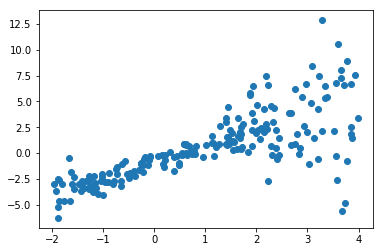

In [26]:
plt.plot(x, y, 'o')
plt.show()

In [27]:
x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

n_epochs = 500
training_costs = []

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(n_epochs):
        c, _ = sess.run([cost, train_op], feed_dict={tf_x: x_train, tf_y: y_train})
        training_costs.append(c)
        if not e % 50:
            print('Epochs %4d: %.4f' % (e, c))

Epochs    0: 12.2230
Epochs   50: 8.3876
Epochs  100: 6.5721
Epochs  150: 5.6844
Epochs  200: 5.2269
Epochs  250: 4.9725
Epochs  300: 4.8169
Epochs  350: 4.7119
Epochs  400: 4.6347
Epochs  450: 4.5742


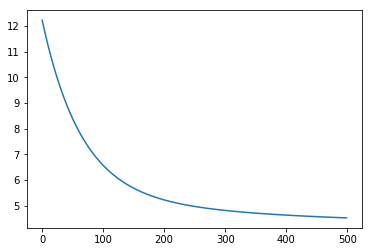

In [28]:
plt.plot(training_costs)
plt.show()

## 計算グラフのオブジェクトの名前

In [29]:
n_epochs = 500
training_costs = []

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(n_epochs):
        c, _ = sess.run(['cost:0', 'train_op'], feed_dict={'tf_x:0': x_train, 'tf_y:0': y_train}) #コストを'cost:0'という名前で評価
        training_costs.append(c)
        if not e % 50:
            print('Epochs %4d: %.4f' % (e, c))

Epochs    0: 12.2230
Epochs   50: 8.3876
Epochs  100: 6.5721
Epochs  150: 5.6844
Epochs  200: 5.2269
Epochs  250: 4.9725
Epochs  300: 4.8169
Epochs  350: 4.7119
Epochs  400: 4.6347
Epochs  450: 4.5742


## モデルの保存と復元

In [30]:
with g.as_default():
    saver = tf.train.Saver()

In [31]:
n_epochs = 500
training_costs = []

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(n_epochs):
        c, _ = sess.run([cost, train_op], feed_dict={tf_x: x_train, tf_y: y_train})
        training_costs.append(c)
        if not e % 50:
            print('Epochs %4d: %.4f' % (e, c))
            
    #モデルの保存
    saver.save(sess, './train-model')

Epochs    0: 12.2230
Epochs   50: 8.3876
Epochs  100: 6.5721
Epochs  150: 5.6844
Epochs  200: 5.2269
Epochs  250: 4.9725
Epochs  300: 4.8169
Epochs  350: 4.7119
Epochs  400: 4.6347
Epochs  450: 4.5742


In [32]:
#計算グラフの再構築
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./train-model.meta')

In [34]:
#モデルを復元した上で計算
g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph('./train-model.meta')
    new_saver.restore(sess, './train-model')
    y_pred = sess.run('y_hat:0', feed_dict={'tf_x:0': x_test})

INFO:tensorflow:Restoring parameters from ./train-model


In [36]:
x_arr = np.arange(-2, 4, 0.1)
g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph('./train-model.meta')
    new_saver.restore(sess, './train-model')
    y_arr = sess.run('y_hat:0', feed_dict={'tf_x:0': x_arr})

INFO:tensorflow:Restoring parameters from ./train-model


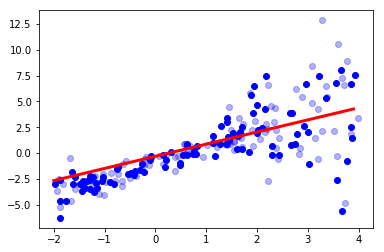

In [37]:
plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr.T[:, 0], '-r', lw=3)
plt.show()

## 多次元配列への変換

In [38]:
g = tf.Graph()
with g.as_default():
    arr = np.array([[1., 2., 3., 3.5],
                               [4., 5., 6., 6.5],
                               [7., 8., 9., 9.5]])
    T1 = tf.constant(arr, name='T1')
    print(T1)
    s = T1.get_shape()
    print('Shape of T1 is', s)
    T2 = tf.Variable(tf.random_normal(shape=s))
    print(T2)
    T3 = tf.Variable(tf.random_normal(shape=(s.as_list()[0],)))
    print(T3)

Tensor("T1:0", shape=(3, 4), dtype=float64)
Shape of T1 is (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(3,) dtype=float32_ref>


In [39]:
#テンソルの形状を変更
#１つの次元を-1に指定すると新しい次元は元の配列と残りの指定した次元を元に指定される
with g.as_default():
    T4 = tf.reshape(T1, shape=[1, 1, -1], name='T4')
    print(T4)
    T5 = tf.reshape(T1, shape=[1, 3, -1], name='T5')
    print(T5)

Tensor("T4:0", shape=(1, 1, 12), dtype=float64)
Tensor("T5:0", shape=(1, 3, 4), dtype=float64)


In [40]:
with tf.Session(graph=g) as sess:
    print(sess.run(T4))
    print()
    print(sess.run(T5))

[[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]]

[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]]


In [41]:
#配列の転置、次元の入れ替え
with g.as_default():
    T6 = tf.transpose(T5, perm=[2, 1, 0], name='T6')
    print(T6)
    T7 = tf.transpose(T5, perm=[0, 2, 1], name='T7')
    print(T7)

Tensor("T6:0", shape=(4, 3, 1), dtype=float64)
Tensor("T7:0", shape=(1, 4, 3), dtype=float64)


In [43]:
#テンソルをリストに分割
with g.as_default():
    t5_splt = tf.split(T5, num_or_size_splits=2, axis=2, name='T8')
    print(t5_splt)

[<tf.Tensor 'T8:0' shape=(1, 3, 2) dtype=float64>, <tf.Tensor 'T8:1' shape=(1, 3, 2) dtype=float64>]


In [44]:
#テンソルの連結
g = tf.Graph()

with g.as_default():
    t1 = tf.ones(shape=(5, 1), dtype=tf.float32, name='t1')
    t2 = tf.zeros(shape=(5, 1), dtype=tf.float32, name='t2')
    print(t1)
    print(t2)

with g.as_default():
    t3 = tf.concat([t1, t2], axis=0, name='t3')
    print(t3)
    t4 = tf.concat([t1, t2], axis=1, name='t4')
    print(t4)

Tensor("t1:0", shape=(5, 1), dtype=float32)
Tensor("t2:0", shape=(5, 1), dtype=float32)
Tensor("t3:0", shape=(10, 1), dtype=float32)
Tensor("t4:0", shape=(5, 2), dtype=float32)


In [45]:
with tf.Session(graph=g) as sess:
    print(t3.eval())
    print()
    print(t4.eval())

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
